Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Dataset summary statistics
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   

/tmp/ipython-input-3885512673.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


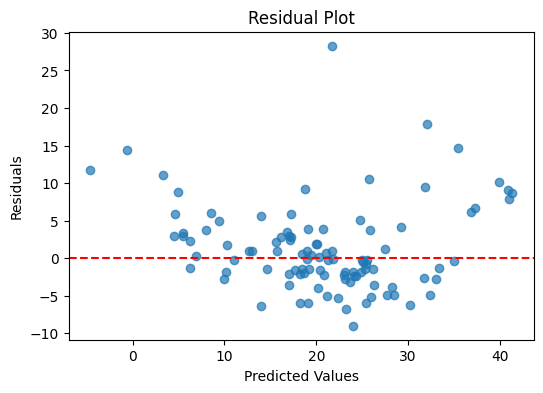

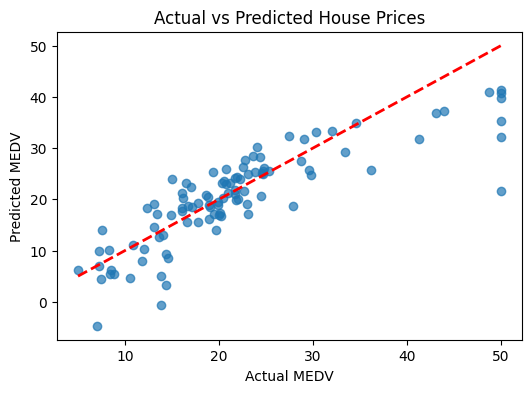


===== Model Comparison (R² Scores) =====
Linear Regression R²: 0.69
Ridge Regression R²: 0.69
Lasso Regression R²: 0.68


In [2]:
# =========================
# Boston Housing Regression Project
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------
# Load Data
# -------------------------
df = pd.read_csv("HousingData.csv")

print("Dataset information")
print(df.info())

print("\nDataset summary statistics")
print(df.describe(include='all'))

print("\nDataset shape")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nInitial rows of the dataset")
print(df.head())

print("\nMissing values")
print(df.isnull().sum())

# -------------------------
# Preprocessing
# -------------------------
missing_cols = df.columns[df.isnull().any()].tolist()
for col in missing_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation")
print(df.isnull().sum())

# -------------------------
# Features & Target
# -------------------------
X = df.drop('MEDV', axis=1)
y = df['MEDV']

print("\nFeatures:", X.columns.tolist())
print("Target Variable: MEDV")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40
)

# -------------------------
# Linear Regression Model
# -------------------------
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n===== Linear Regression Evaluation =====")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_model.coef_

}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

# -------------------------
# Residual Analysis
# -------------------------
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig("ResidualPlot.png", dpi=300, bbox_inches='tight')
plt.show()

# -------------------------
# Actual vs Predicted
# -------------------------
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.savefig("HousePricingResult.png", dpi=300, bbox_inches='tight')
plt.show()

# -------------------------
# Model Comparison: Ridge & Lasso
# -------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\n===== Model Comparison (R² Scores) =====")
print(f"Linear Regression R²: {r2_score(y_test, y_pred):.2f}")
print(f"Ridge Regression R²: {r2_score(y_test, ridge_pred):.2f}")
print(f"Lasso Regression R²: {r2_score(y_test, lasso_pred):.2f}")
